
# Project: Investigating the TMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> The Dataset contains:
><ul>
    <li>10866 observations/rows</li>
    <li>26 features/columns</li>
    <li>9 columns with null values</li>
    <li>8874 rows that have null values in one or more columns</li>
    <li>Columns like budget, revenue, budget_adj, revenue_adj contain lots of 0s</li>



In [656]:
# Setting up import statements and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
colors = ['Grey', 'Purple', 'Blue', 'Brown', 'Green', 'Orange', 'Red', 'Lime', 'Olive', 'Silver']


#Loading dataset into a dataframe using pandas

imdb_df = pd.read_csv("tmdb-movies.csv")

## Questions
> Questions we would like to answer with this dataset include:
> <ol>
    <li>Which genres are most popular from year to year?</li>
    <li>The number of Movies Released Each Year.</li>
    <li>Which is the most popular movie and the least popular movie and what features are associated with popular and less popular movies?</li>
    <li>Has the runtime of movies been declining over the years?</li>
    <li>Is the Movie industry making or loosing money and what is the relationship between budget and popularity?</li>    
  </ol>


<a id='wrangling'></a>
## Data Wrangling

> In this section we will look at the features of the dataset and see if their is a need to clean it.

### General Properties of the Tmdb Movie Dataset

In [657]:
# Looking at the first few rows of the dataset

imdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [658]:
# Lets look at the shape of the dataset

imdb_df.shape

(10866, 21)

> The dataset contains <b>10866</b> rows and <b>21</b> columns.

In [659]:
# Using .info() method to look at dataset information

imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> Looks like some columns in the dataset contain null values

In [660]:
#looking at the last few rows of the dataset

imdb_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


> The dataset also has columns with zero values

In [661]:
#Number of nulls in each column

imdb_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [662]:
# total number of columns with null values

imdb_df.isna().any().sum()

9

In [663]:
# list of columns with null values

list(imdb_df.columns[imdb_df.isna().any()])

['imdb_id',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'genres',
 'production_companies']

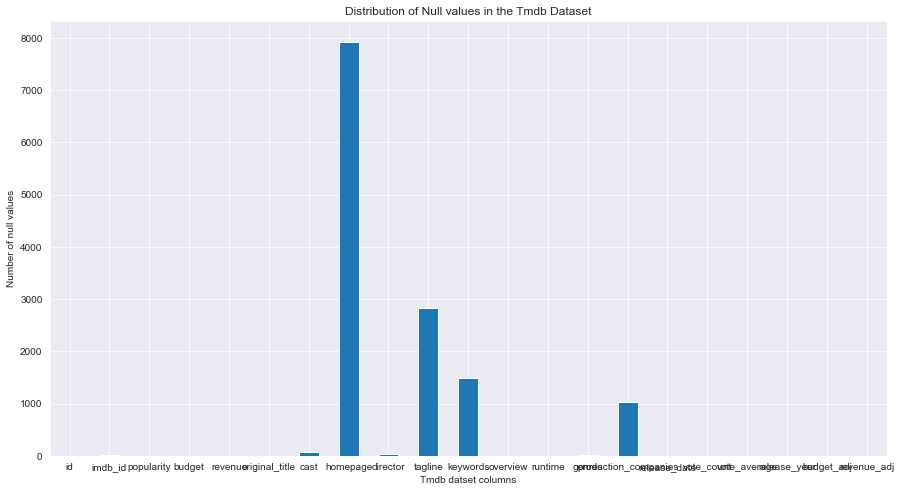

In [664]:
#Visualizing the distribution of null values in each column

imdb_df.isna().sum().plot(kind='bar', figsize=(15,8), rot=0)
plt.title("Distribution of Null values in the Tmdb Dataset")
plt.xlabel("Tmdb datset columns")
plt.ylabel("Number of null values")
plt.show()

> The homepage column has the highest number of null values followed by tagline and keywords

In [665]:
#Number of rows with missing data

imdb_df.isna().any(axis=1).sum()

8874

### Conclusion

### Dataset Information

> Using the .info() method, we see that there are columns with null values in the dataset. 

> Another observation is the release_date column has a type of "String". It should be changed to datetime object.

> Further inspection tells us that there are 9 columns with null values and the most affected is the homepage column with 7930 nulls out of 10866 observations. The distribution of nulls was visualized with a bar chart as shown above.

> we also see that there 8874 rows with null values in one or more columns

> We will need to determine which columns to keep for our analysis and whether to discard those with nulls or fill them with aggregate data.

### Data Cleaning

Data Cleaning Steps to be carried out

> **Columns to Drop**: We will be dropping columns we have identified as "not important to our analysis or questions". They include: 
> <ul>
    <li>imdb_id</li>
    <li>cast</li>
    <li>homepage</li>
    <li>tagline</li>
    <li>keywords</li>
    <li>overview</li>
    <li>production_companies</li>
    <li>revenue_adj</li>
    <li>budget_adj</li>
</ul>

> **Dealing With nulls**: Since we identified that there are 8874 rows in the Tmdb dataset that contain null values as a result of the homepage column having over 7000 null values. This will be dealt with after dropping the homepage column. After which, we will have to drop null values from the columns we are keeping.

>**Columns with zeros (0s)**: we will replace zeros with nans (null values) without removing them from the dataset.

>**Changing data types**: The release_date column type will be changed to datetime.

>**Duplicates**: duplicates will be identified and dropped.

#### Dropping Unwanted Columns

In [666]:
# Dropping unwanted columns

imdb_df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'revenue_adj', 'budget_adj'], inplace=True, axis=1)

In [667]:
# Verifying that specified columns have been dropped
imdb_df.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [668]:
# The new shape of dataset after dropping columns

imdb_df.shape

(10866, 12)

#### Dealing with nulls and 0s

In [669]:
# Replacing 0s with nan using Numpy's np.nan function

imdb_df.replace(0, np.nan, inplace=True)

In [670]:
# Number of null values after replacing 0s with nan in the remaining columns 

imdb_df.isna().sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
director            44
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

#### Changing release_date Data Type

In [671]:
# converting the release_date column type from string to datetime using pandas to_datetime function

imdb_df['release_date'] = pd.to_datetime(imdb_df['release_date'])

In [672]:
# checking to see if the conversion was successful

imdb_df.dtypes

id                         int64
popularity               float64
budget                   float64
revenue                  float64
original_title            object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

#### Duplicates

In [673]:
#Number of duplicates in the dataset

imdb_df.duplicated().sum()

1

In [674]:
# looking at the duplicated row

imdb_df[imdb_df.duplicated()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
2090,42194,0.59643,30000000.0,967000.0,TEKKEN,Dwight H. Little,92.0,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010


In [675]:
# Taking a closer look at the duplicated rows

imdb_df[imdb_df['id'] == 42194]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
2089,42194,0.59643,30000000.0,967000.0,TEKKEN,Dwight H. Little,92.0,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010
2090,42194,0.59643,30000000.0,967000.0,TEKKEN,Dwight H. Little,92.0,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010


In [676]:
# Drop duplicate
imdb_df.drop_duplicates(inplace=True)

In [677]:
# verifying that duplicate has been removed
imdb_df.duplicated().sum()

0

In [678]:
# Final Shape: Number of rows and columns after cleanning the dataset

imdb_df.shape

(10865, 12)

### Conclusion

> After dropping unwanted columns, nulls, duplicates and changing the data type of the release_date column to datetime, the dataset now has a dimension of <b>10865</b> rows and <b>12</b> columns.

<a id='eda'></a>
## Exploratory Data Analysis




In [679]:
# Looking the descriptive information about the numerical columns of the Tmdb dataset using .describe() method.

imdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


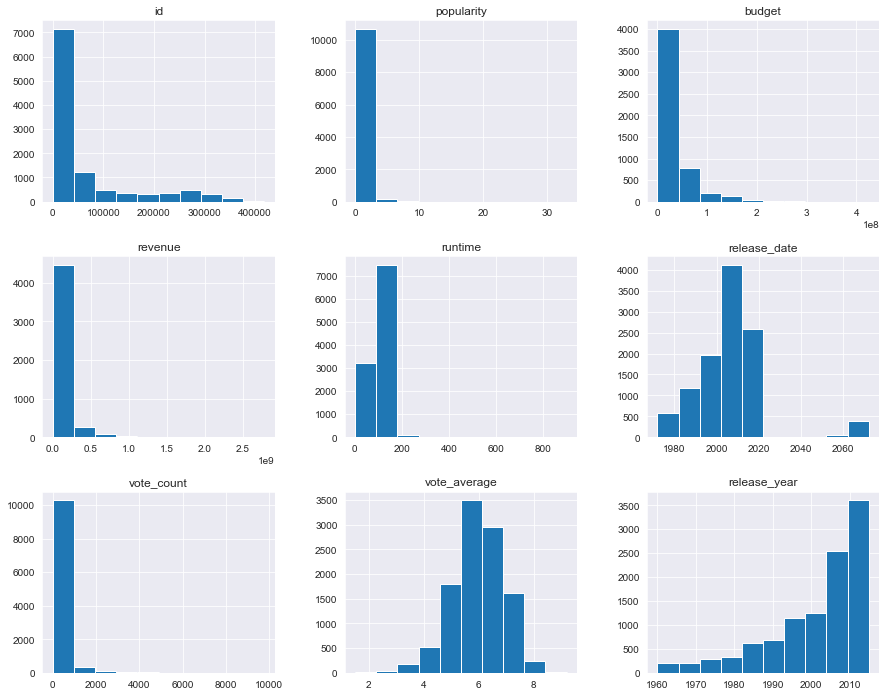

In [680]:
# Plotting the histogram of all numerical columns in the Tmdb dataset

imdb_df.hist(figsize=(15,12));

### Conclusion

#### From the .describe() method we see that the maximum popularity score is 32.99, maximum runtime of 900 minutes (unit is not specified, I am assuming).

> We also see the min, max, mean values for the budget and revenue columns

#### These histograms show mostly right skewed distributions with the exception of vote_average and release year that are left skewed.

## Research Questions

### Question 1: Which genres are most popular from year to year?

In [681]:
# printing the first few rows of the genres column
imdb_df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [682]:
# Number of unique values in the genres column

imdb_df['genres'].nunique()

2039

> data in the genres column represents all the genres that each movie falls into which could be more than one genre separated by pipe |
there are 1053 unique genres in the genres column. That's a lot.

In [683]:
# converting each individual genre value into rows using pandas explode function

genres_explode = imdb_df.assign(genres=imdb_df['genres'].str.split("|")).explode("genres")

genres_explode.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,2015-06-09,5562,6.5,2015
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Adventure,2015-06-09,5562,6.5,2015
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Science Fiction,2015-06-09,5562,6.5,2015
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,2015-05-13,6185,7.1,2015


In [684]:
# number of unique values in genres column of the genres_explode dataframe

genres_explode['genres'].nunique()

20

In [685]:
#Calculating the number of movies in each genre

genres_explode['genres'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

> The Drama genre has the highest number of movies followed by comedy and thriller

In [686]:
# defining a function to calculate the average feature of a column

def groupby_average(df, grb_col, avg_col):
    return df.groupby(grb_col)[avg_col].mean()

# Calculating the average popularity value for each genres sorted in descending order and printing the result

print(groupby_average(genres_explode, 'genres', 'popularity').sort_values(ascending=False))

genres
Adventure          1.154259
Science Fiction    1.001548
Fantasy            0.992840
Action             0.926274
Animation          0.852182
Family             0.786668
Crime              0.744930
Thriller           0.741563
War                0.727683
Mystery            0.690012
Comedy             0.592607
Romance            0.592082
Drama              0.591495
Western            0.590615
History            0.575936
Music              0.487321
Horror             0.465357
TV Movie           0.270896
Foreign            0.191496
Documentary        0.181432
Name: popularity, dtype: float64


> From the above result, we see that science fiction is the most popular genre from year to year followed by Adventure and Fantasy

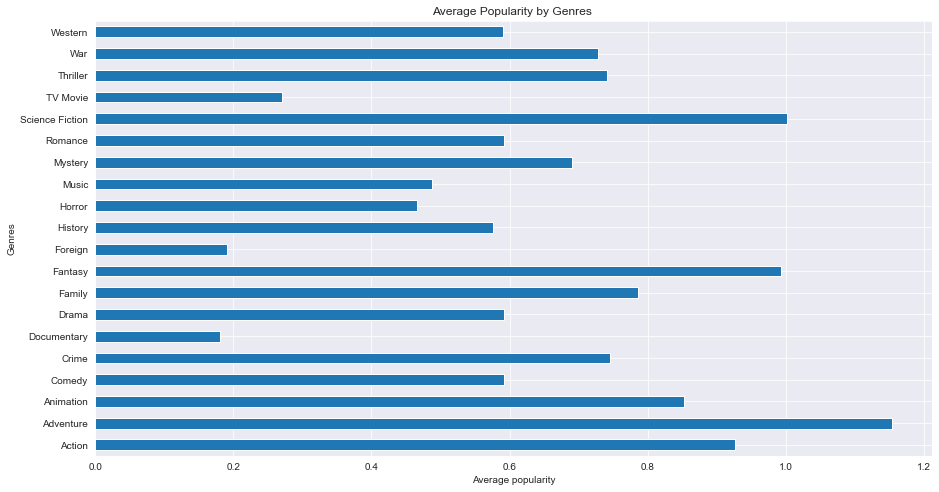

In [687]:
# Visualizing the average popularity by genre using an horizontal bar chart

groupby_average(genres_explode, 'genres', 'popularity').plot(kind='barh', figsize=(15, 8))
plt.title("Average Popularity by Genres ")
plt.ylabel("Genres")
plt.xlabel("Average popularity")
plt.show()

### Conclusion

> On inspecting the genres column we see that values in the genres column are represented by multiple genres with each genre separated by |.
<br>
<br>
> Due the structure of the genres column, values in the column were separated into rows using pandas explode() function. A new dataframe was created called genres_explode which was used only for the analysis of data in the genres column.
<br>
<br>
> Using the value_counts function on the genres column of the genres_explode dataframe, we are able to see the number of movies in each genre. The <b>Drama</b> genre has the highest number of movie followed by Comedy and Thriller.
<br>
<br>
> Finally, we grouped the new dataframe by genre and calculated the average popularity score for each genre, sorting the results in descending order. From the result and visualization, we are able to see that science fiction and adventure are the most popular genres.



### Question 2: The number of Movies Released Each Year

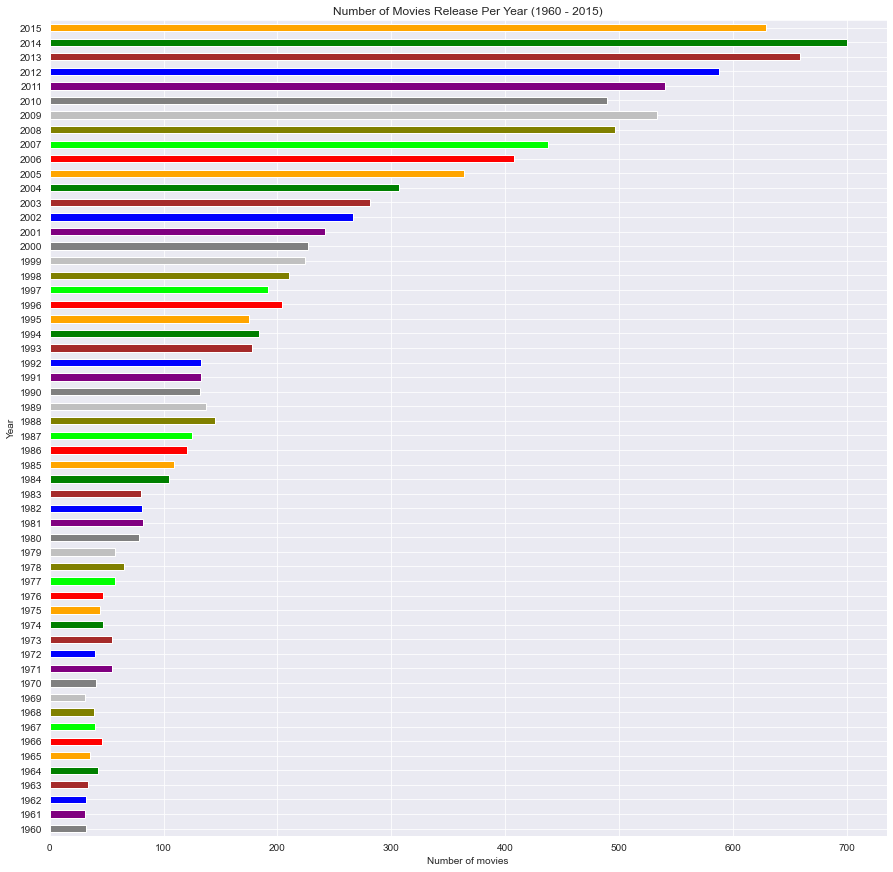

In [688]:
# counting the number of movies released each year and visualizing it.

movies_per_year = imdb_df['release_year'].value_counts()

movies_per_year.sort_index().plot(kind='barh', color = colors, figsize=(15, 15))
plt.title("Number of Movies Release Per Year (1960 - 2015)")
plt.ylabel("Year")
plt.xlabel("Number of movies")
plt.show()

### Conclusion

> From the horizontal bar chat plotted above, the top three years with the highest number of movie releases are :

> <ol>
    <li>2011</li>
    <li>2013</li>
    <li>2010</li>
 </ol>

## Question 3: Which is the most popular movie and the least popular movie and what features are associated with popular and less popular movies.

In [689]:
# getting the maximum value from the popularity column

max_pop = imdb_df['popularity'].max()

max_pop

32.985763

In [690]:
# getting the minimum value from the popularity column

min_pop = imdb_df['popularity'].min()

min_pop

6.5e-05

In [691]:
# The most popular movie

imdb_df.query('popularity == 32.985763')

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


In [692]:
#The least popular movie

imdb_df.query('popularity == 0.001117')

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
7268,1392,0.001117,350000.0,3515061.0,Born into Brothels,Zana Briski|Ross Kauffman,85.0,Documentary,2004-12-08,23,6.4,2004


In [693]:
#getting the average popularity value

mean = imdb_df['popularity'].mean()
mean

0.6464455549010583

In [694]:
# subsetting the imdb_df dataframe to get rows of popular and less popular movies using the mean of popularity

pop_movies = imdb_df[imdb_df['popularity'] >= mean]
less_pop = imdb_df[imdb_df['popularity'] < mean]

In [695]:
# looking at the first three rows of popular movies

pop_movies.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015


In [696]:
#looking at the first three rows of less popular movies

less_pop.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
215,332502,0.644786,NaN,NaN,400 Days,Matt Osterman,91.0,Mystery|Science Fiction|Thriller,2015-10-29,98,4.2,2015
216,286192,0.640151,NaN,NaN,Lava,James Ford Murphy,7.0,Animation|Comedy|Family|Fantasy|Music,2015-06-19,298,7.3,2015
217,284674,0.638557,NaN,NaN,Air,Christian Cantamessa,94.0,Thriller|Science Fiction,2015-08-14,135,4.7,2015


In [697]:
# the features associated with popular movies

pop_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3060.000000,3060.000000,2.494000e+03,2.531000e+03,3059.000000,3060.000000,3060.000000,3060.000000
mean,55903.443464,1.547356,4.654165e+07,1.473472e+08,107.838836,648.960131,6.251634,2003.034967
std,86054.858053,1.534274,4.670737e+07,2.035087e+08,23.782008,939.785040,0.798204,11.192617
min,5.000000,0.646745,8.000000e+00,1.600000e+01,2.000000,10.000000,3.300000,1960.000000
25%,4632.000000,0.820671,1.500000e+07,2.909385e+07,95.000000,144.000000,5.700000,1997.000000
50%,11411.500000,1.090704,3.000000e+07,8.054787e+07,105.000000,311.500000,6.300000,2006.000000
75%,67979.500000,1.682561,6.200000e+07,1.793224e+08,119.000000,722.250000,6.800000,2012.000000
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000


In [698]:
# features of less popular movies

less_pop.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,7805.000000,7805.000000,2.675000e+03,2.318000e+03,7775.000000,7805.000000,7805.000000,7805.000000
mean,70050.816272,0.293238,1.600673e+07,2.579102e+07,100.209775,48.203587,5.866560,2000.650224
std,94117.020868,0.164358,2.100661e+07,4.502619e+07,33.102271,115.954222,0.962219,13.335992
min,17.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,12526.000000,0.160986,3.000000e+06,2.075754e+06,89.000000,14.000000,5.300000,1993.000000
50%,24480.000000,0.276694,9.500000e+06,1.201807e+07,97.000000,23.000000,5.900000,2005.000000
75%,79931.000000,0.418611,2.025000e+07,3.107846e+07,108.000000,48.000000,6.500000,2011.000000
max,414419.000000,0.646441,4.250000e+08,7.886798e+08,900.000000,4368.000000,9.200000,2015.000000


### Conclusion

> The features show that the average budget of popular movies is higher than that of less popular movies. The other features show little differences between the two categories.

> Yes money is an important feature that is required to make a popular movie. What other features are important; story, director, cast??? This is an important question to pose when investigating further.

### Question 4: Has the runtime of movies been declining over the years

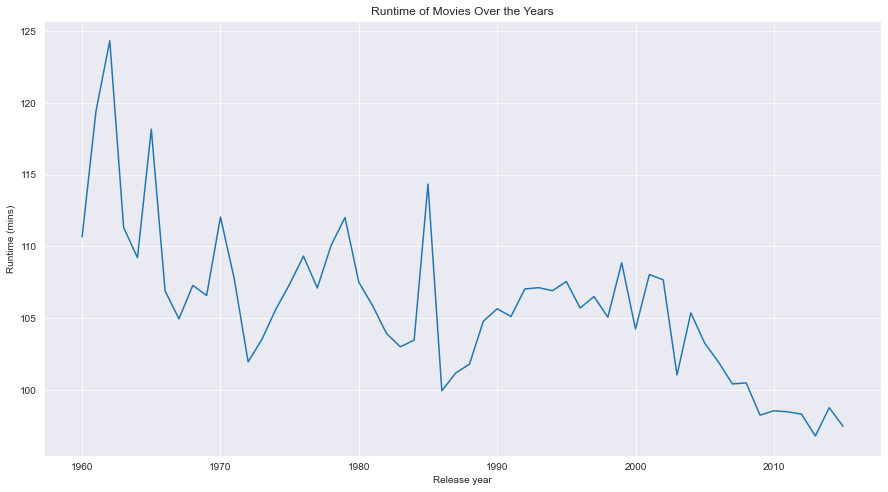

In [699]:
#Grouping by year and plotting the average runtime for each year

groupby_average(imdb_df, 'release_year', 'runtime').plot(figsize=(15,8))
plt.xlabel("Release year")
plt.ylabel("Runtime (mins)")
plt.title("Runtime of Movies Over the Years")
plt.show()

> This looks like the average runtime of movies have been declining over the years. Confirming with a scatter plot 

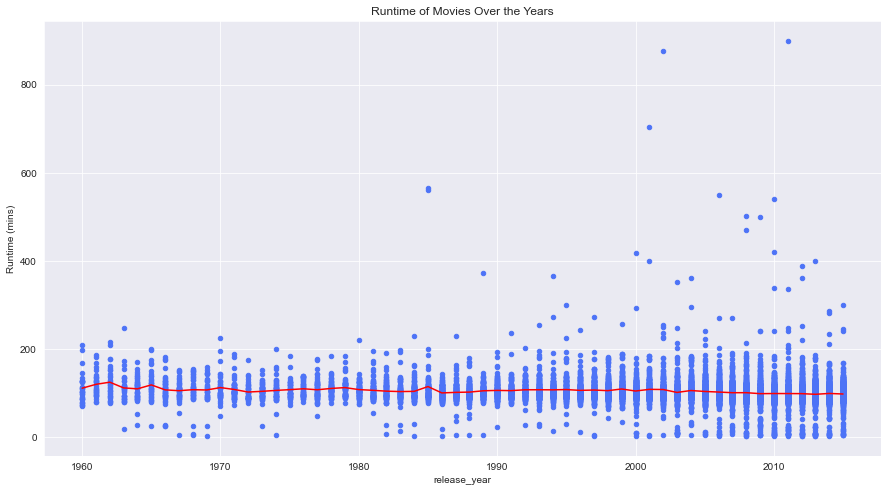

In [700]:
# defining a function to plot scatter plots without the color argument

def plot_scatter(df, x_axis, y_axis, size, alpha, color, xlabel, ylabel, title):
    df.plot(kind='scatter', x=x_axis, y=y_axis, s=size, alpha=alpha, color=color, figsize=(15, 8))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


#plotting a scatter plot of runtime as a function of release_year

plot_scatter(imdb_df, 'release_year', 'runtime', None, None, '#4D73F7', "Release year", "Runtime (mins)", "Runtime of Movies Over the Years")
imdb_df.groupby('release_year')['runtime'].mean().plot(color="red", label="average_runtime" )
plt.show()

> Movie runtime doesn't appear to be declining as can be seen by the observations in the scatter plot and the red line of average movie runtime drawn accross it.

> Can we make the plot a little clearer? seems there are movies with short runtime.

In [701]:
# Comparing runtime with average runtime to create a list of colors to be  used as the color argument in the scatter plot.

avg_runtime = imdb_df['runtime'].mean() #average run time
colors = [] # empty list

for lab, row in imdb_df.iterrows():
    if row['runtime'] < avg_runtime:
        colors.append('blue')
    elif avg_runtime <= row['runtime'] <= 180:
        colors.append('red')
    else:
        colors.append('black')

# printing a list of the first fifty colors
print(colors[:50])

s = imdb_df['budget'] / 1000000 # dividing budget values by one million to be used as the size attribute of the scatter plot

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'red']


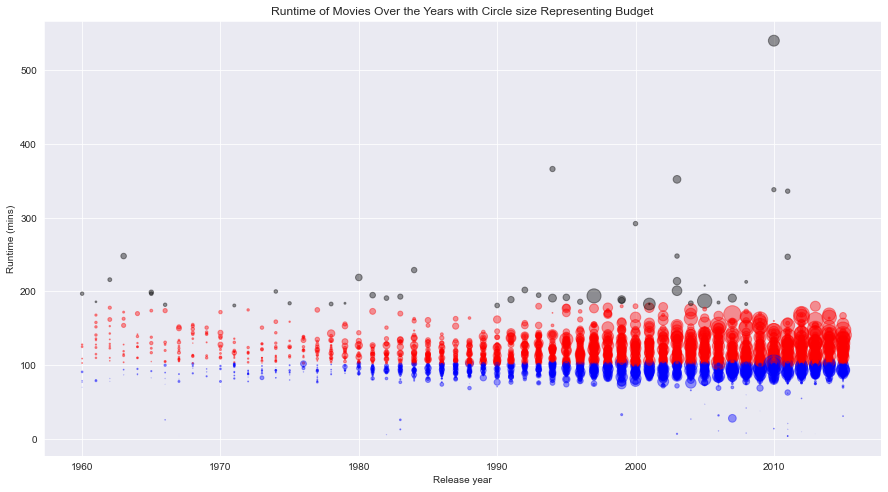

In [702]:
# Plotting with color and size

plot_scatter(imdb_df, 'release_year', 'runtime', s, 0.4, colors, "Release year", "Runtime (mins)", "Runtime of Movies Over the Years with Circle size Representing Budget")
plt.show()

> Movies with runtime > 3 hrs = Black

> Movies with runtime > average run time <= 3 hrs = Red

> Movies with runtime < average run time = Blue

### Conclusion

> From the line plot, we see that the average runtime of movies have been declining over the years. But after taking a closer look with a scatter plot we see that that is not the case.

> From the scatter plots we see that movie lengths have practically remained the same over the years and that most movies with long runtime have large budgets.

### Question 5: Is the Movie industry making or loosing money and what is the relationship between budget and popularity?

In [703]:
# calculating and adding the profit column to the imdb_df dataframe
imdb_df['profit'] = imdb_df['revenue'] - imdb_df['budget']

imdb_df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.852382e+08


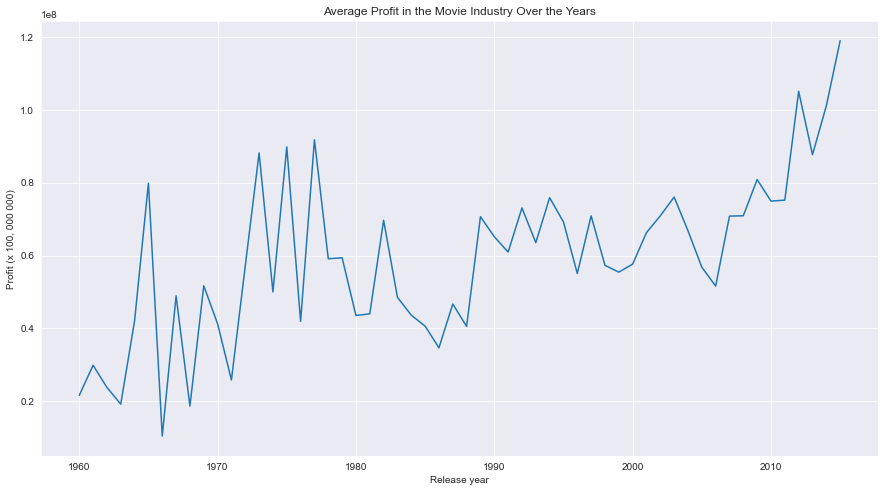

In [704]:
# Grouping by year and calculating the average profit over the years. Then visualizing the result with a line plot.

groupby_average(imdb_df, 'release_year', 'profit').plot(figsize=(15, 8))
plt.xlabel("Release year")
plt.ylabel("Profit (x 100, 000 000)")
plt.title("Average Profit in the Movie Industry Over the Years")
plt.show()

> The line plot shows that the movie industry has been making profit over the years

#### Relationship between budget and popularity

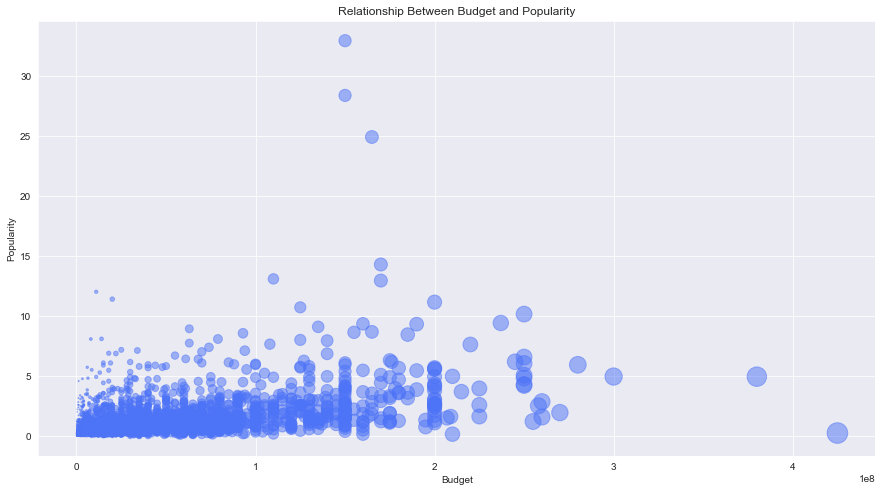

In [705]:
# creating a scatter plot of popularity as a function of budget

plot_scatter(imdb_df, 'budget', 'popularity', s, 0.5, '#4D73F7', "Budget", "Popularity", "Relationship Between Budget and Popularity")
plt.show()

> The scatter plot shows that a relationship exists between budget and poularity.

### Conclusion

> The line plot shows that profit in the movie industry has been increasing over the years and not declining.

> Their exists a relationship between budget and popularity however, at this point in time it is not clear how weak or strong that relationship is.

<a id='conclusions'></a>
## Conclusions
<br>
<br> It is important to state that the methods and approaches used to answer the research questions in this project and the result obtained are tentative and subject to confirmation by someone who is a qualified data analyst.
<br>  
<br>
In conclusion, we were able:

> To Clean up the genres column by separating each genre into rows using pandas explode() function and created a new dataframe in the process.
> > Using the value_counts() function on the genres column of the new dataframe we were able to count the number of movies in each genre with <b>Drama</b> as the genre with the highest number of movies.
<br>
<br>
> > Finally, the new dataframe was grouped by the genres column and the average popularity score for each genre was calculated. From the result and visualization, we are able to see that science fiction and adventure are the most popular genres

> To identify the year with highest number of movie releases. <br/>
> > The groupby() function was used on the release_year column with the value_counts() function to get the number movies release each year. The result was then sorted by index in descending order and plotted using an horizontal bar chart. <b> 2011 was shown as the year with highest number of movie releases </b>


> To identify the most popular movie and the least popular movie and what features are associated with popular and less popular movies.<br/>
> >**The most Popular and least popular movie**: The maximum and minimum popularity values were obtained using the max() and min() functions on the popularity column of the dataframe. These values were then used filter for the most popular movie and least popular movie respectively. <br/>
<br>
> > **Features of popular and less popular movies**: The average popularity value was calculated using the mean() function which was used to create two dataframe subsets of popular movies and less popular movies. The .describe() function was then used to print summary statistics of both subsets. <b>The features show that the average budget of popular movies is higher than that of less popular movies. The other features show little differences between the two categories.</b>

> To determine that the runtime of movies haven't been declining over the years.<br>
> > We grouped the dataset by the release_year column and calculated the average runtime each year which we plotted using a line plot. <b>The line plot showed that the average movie runtime has been declining over the years.</b>
<br>
<br>
> > Confirming the decline of movie runtime over the years, a scatter plot was created. <b> The visualization showed that movie runtime hasn't being declining over the years</b> The visualization was made clearer with color added to the plot based on a filter of average runtime together with the size attribute based on budget divided by 1000000.

> To determine if the movie industry has being making or loosing money over the years and the relationship between budget and popularity.
<br>
> > The profit made by each movie was calculated and added to the dataframe as new column. The dataframe was then grouped by release_year column with the average profit calculated. The result was then visualized using a line plot. <b> The result showed that the movie industry has been making profit over the years</b>
<br>
<br>
> >**Budget and Popularity**: The popularity column was plotted as a function of the budget column using a scatter plot with the size attribute of the scatter plot set to budget/1000000. <b>The result showed that there is a  relationship between budget and popularity. However, we were unable to determine how strong this relationship is as at this time</b>.




<a id='references'></a>
## References

<ol>
    <li>https://github.com/deepak525/Investigate_TMDb_Movies</li>
    <li>https://github.com/deepak525/Investigate_TMDb_Movies/blob/master/investigate_the_TBMb_Dataset.ipynb</li>
    <li>https://www.kaggle.com/code/deepak525/investigate-tmdb-movie-dataset/notebook</li>
    <li>https://github.com/deepak525/Investigate_TMDb_Movies/blob/master/investigate_the_TBMb_Dataset.ipynb</li>
    <li>https://matplotlib.org/3.5.0/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py</li>
    <li>https://review.udacity.com/#!/reviews/3523302</li>
</ol>